**Pipeline** : \
load -> split -> train -> predict -> confusion matrix

## Step 0: Setup

In [2]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split

## Step 1: Load dataset

In [5]:
iris = load_iris()

In [6]:
for key in iris:
    print(key)

data
target
frame
target_names
DESCR
feature_names
filename
data_module


In [7]:
X = iris.data
y = iris.target

In [18]:
# class names
class_names = iris.target_names
print(class_names)

['setosa' 'versicolor' 'virginica']


In [8]:
# dataset as dataframe
import pandas as pd
df = pd.DataFrame(X, columns = iris.feature_names)
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Step 2: Train Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 11
)

## Step 3: Train the Logistic Regression model

In [12]:
model = LogisticRegression(max_iter = 1000)

In [13]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Step 4: Predictions

In [14]:
y_pred = model.predict(X_test)

## Step 5: Confusion Matrix

In [16]:
y_actual = y_test

conf_mat = confusion_matrix( y_actual, y_pred )

In [17]:
print("Confusion Matrix : \n", conf_mat)

Confusion Matrix : 
 [[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]


**Confusion Matrix**
* Columns = Predicited
* Rows = Actual

<table>
    <th>
        <td><b>0</b></td>
        <td><b>1</b></td>
        <td><b>2</b></td>
    </th>
    <tr>
        <td><b>0</b></td>
        <td>9</td>
        <td>0</td>
        <td>0</td>
    </tr>
    <tr>
        <td><b>1</b></td>
        <td>0</td>
        <td>10</td>
        <td>0</td>
    </tr>
    <tr>
        <td><b>2</b></td>
        <td>0</td>
        <td>2</td>
        <td>9</td>
    </tr>
</table>

## Step 6 Confusion matrix heatmap

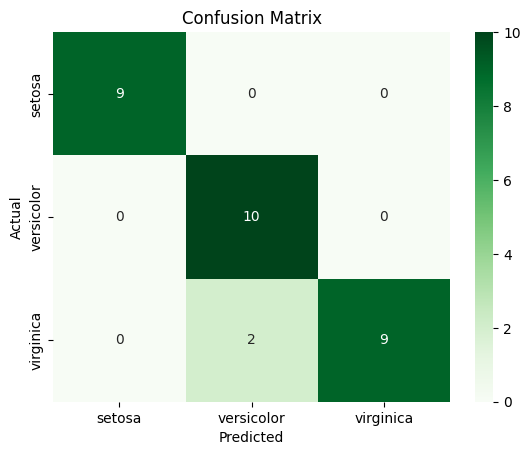

In [19]:
sns.heatmap(
    data = conf_mat,      # 2D data to plot
    annot = True,         # numbers in the box
    fmt = 'd',            # formatting string integer (in the box)
    cmap = 'Greens',      # color mapping
    xticklabels = class_names,
    yticklabels = class_names
)

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

## Step 7: Classification Report

In [20]:
print(classification_report( y_actual, y_pred, target_names = class_names) )

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

